In [33]:
'''Layyana Junaid 23k-0056'''
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

data = pd.read_csv("Mall_Customers.csv")
print(data.head())
print(data.info())



   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


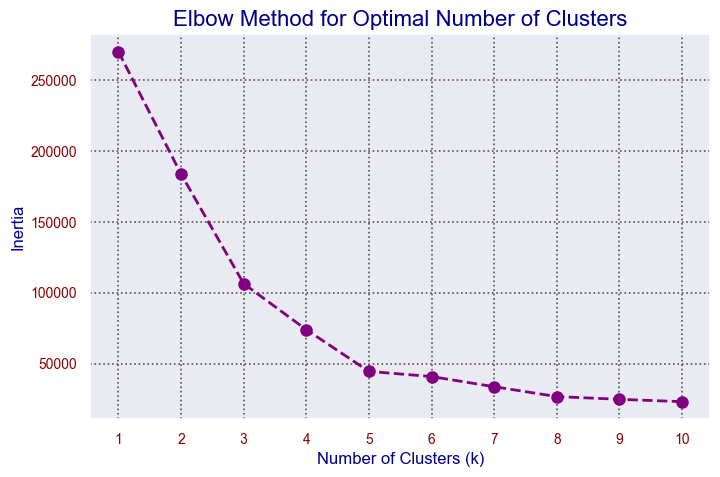

In [35]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

sns.set_theme(style="darkgrid")  
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, color='purple', marker='o', markersize=8, linestyle='--', linewidth=2)  
plt.title("Elbow Method for Optimal Number of Clusters", fontsize=16, color='darkblue')
plt.xlabel("Number of Clusters (k)", fontsize=12, color='darkblue')  
plt.ylabel("Inertia", fontsize=12, color='darkblue') 
plt.xticks(k_values, fontsize=10, color='darkred')
plt.yticks(fontsize=10, color='darkred')
plt.grid(color='#555555', linestyle=':', linewidth=1.2) 
plt.show()




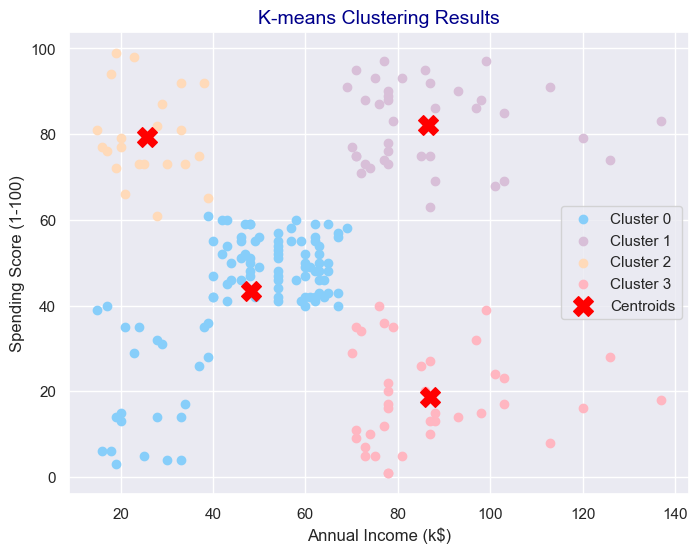

In [43]:
sns.set_theme(style="darkgrid", palette='dark')  
plt.figure(figsize=(8, 6))

cluster_colors = ['lightskyblue', 'thistle', 'peachpuff', 'lightpink']  

for cluster in range(optimal_k):
    cluster_data = features[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income (k$)'], 
        cluster_data['Spending Score (1-100)'], 
        label=f"Cluster {cluster}", 
        color=cluster_colors[cluster]  
    )

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title("K-means Clustering Results", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
